### Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml
import time
#our neural network
from neuralnetwork import Network,FCLayer,ActivationLayer,sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,binary_cross_entropy,binary_cross_entropy_prime,relu,relu_prime
import random
#sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer
import itertools
from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
import itertools
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from neuralnetwork import Network,FCLayer,ActivationLayer
from neuralnetwork import sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,softmax,softmax_prime


### Data

In [2]:
cols = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
        'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=cols)

In [3]:
# Number of samples and number of attributes
num_samples = df_wine.shape[0]
num_attributes = df_wine.shape[1] - 1 # first one is the class annotation
print("The number of samples is: ", str(num_samples))
print("The number of attributes is: ", str(num_attributes))

The number of samples is:  178
The number of attributes is:  13


In [4]:
#Counting the number of samples for each class
wine = df_wine.to_numpy()
num_class_1 = sum(wine[:, 0] == 1)
num_class_2 = sum(wine[:, 0] == 2)
num_class_3 = sum(wine[:, 0] == 3)

print("Number of samples that belong to class 1: ", str(num_class_1))
print("Number of samples that belong to class 2: ", str(num_class_2))
print("Number of samples that belong to class 3: ", str(num_class_3))

Number of samples that belong to class 1:  59
Number of samples that belong to class 2:  71
Number of samples that belong to class 3:  48


### Preparing data for the model

In [5]:
X = df_wine.drop(['class'], axis=1).to_numpy()
Y = df_wine['class']

#### 3-class classification problem

In [6]:
Y = Y.to_numpy().reshape(-1,1)
#splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

#splitting into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state = 1234)

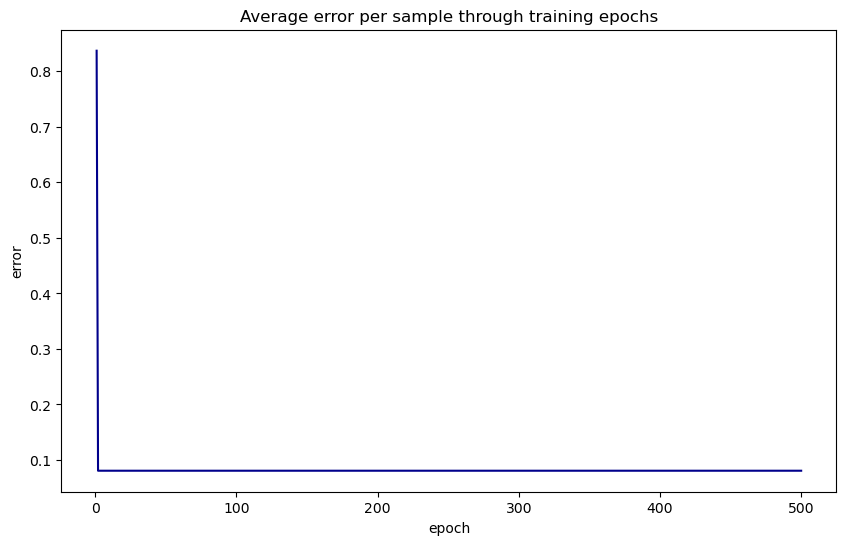

In [7]:
seed = 1000
# network with 2 layers
net = Network()
net.add(FCLayer(13, 10, seed=seed))  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(10, 1, seed=seed))  

# train
net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

#### 1-hot-encoding

In [8]:
X = df_wine.drop(['class'], axis=1).to_numpy()
Y = df_wine['class']

encoder = OneHotEncoder(sparse = False)
y_reshaped = Y.to_numpy().reshape(-1,1)
y_encoded = encoder.fit_transform(y_reshaped)

#splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1234)

#splitting into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state = 1234)


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### First NN - data not scaled

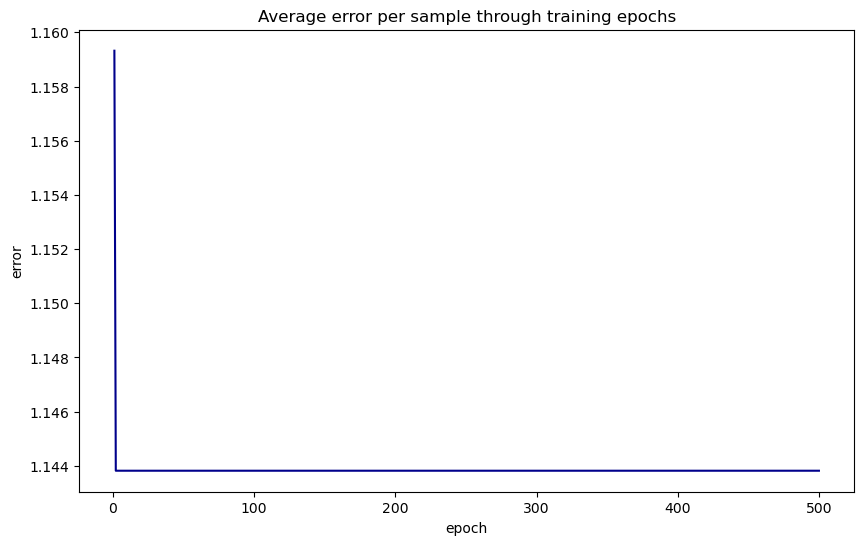

In [9]:
seed = 1234
# network with 2 layers
net_tan = Network()
net_tan.add(FCLayer(13, 10,seed = seed))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(10,3,seed = seed))  
net_tan.add(ActivationLayer(softmax, softmax_prime))

# train
net_tan.use(categorical_cross_entropy, categorical_cross_entropy_prime)
# net_tan.use(mse, mse_prime)

err_vect_tan = net_tan.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net_tan.plot_error_curve(err_vect_tan)

##################################################
Accuracy on train:  0.31496062992125984
Accuracy on test:  0.6
##################################################
Recall on train:  0.31496062992125984
Recall on test:  0.6
##################################################
Precision on train:  0.31496062992125984
Precision on test:  0.6
##################################################


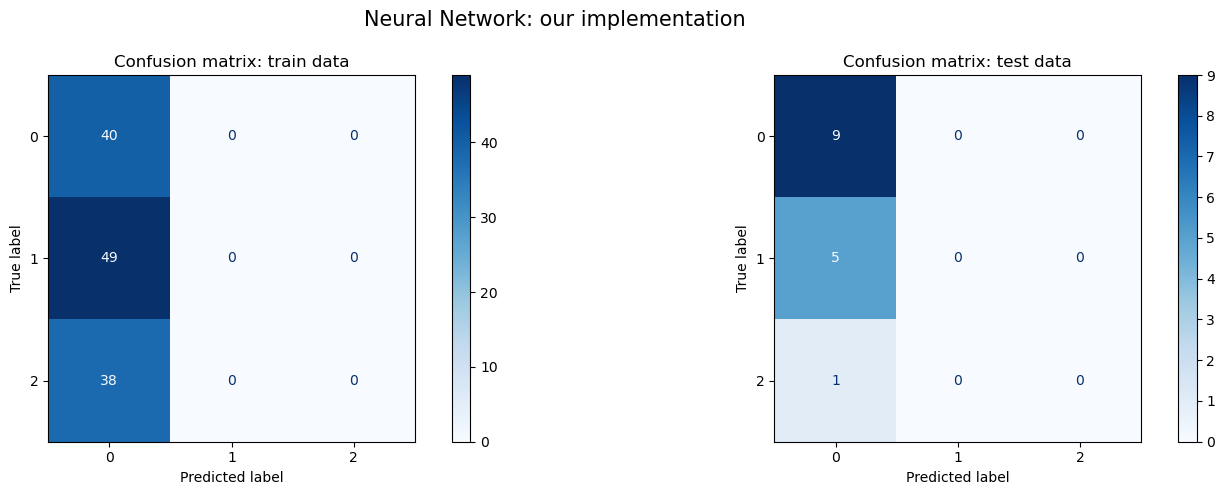

In [10]:
net_tan.nn_evaluate_one_hot(x_train= X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=500, learning_rate=0.1)

Results are completely unsatisfactory. Let's scale the data and see what happens...

### Preprocessing the data using StandardScaler

In [11]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)
X_val_standardized = scaler.transform(X_val)

### Our Neural Network

#### Neural Network with tanh activation in the hidden layers and softmax in the outer layer
As softmax should be applied to the outer layer only, we will use tanh for the other hidden layers

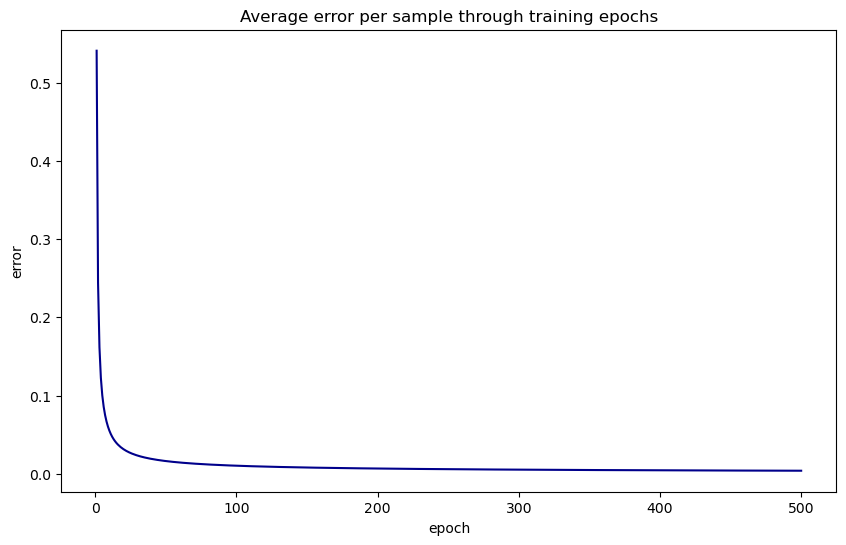

In [12]:
seed = 1234
# network with 2 layers
net_tan = Network()
net_tan.add(FCLayer(13, 10,seed = seed))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(10,3,seed = seed))  
net_tan.add(ActivationLayer(softmax, softmax_prime))

# train
net_tan.use(categorical_cross_entropy, categorical_cross_entropy_prime)
# net_tan.use(mse, mse_prime)


err_vect_tan = net_tan.fit(X_train_standardized, y_train, epochs=500, learning_rate=0.1)
net_tan.plot_error_curve(err_vect_tan)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9333333333333333
##################################################
Recall on train:  1.0
Recall on test:  0.9333333333333333
##################################################
Precision on train:  1.0
Precision on test:  0.9333333333333333
##################################################


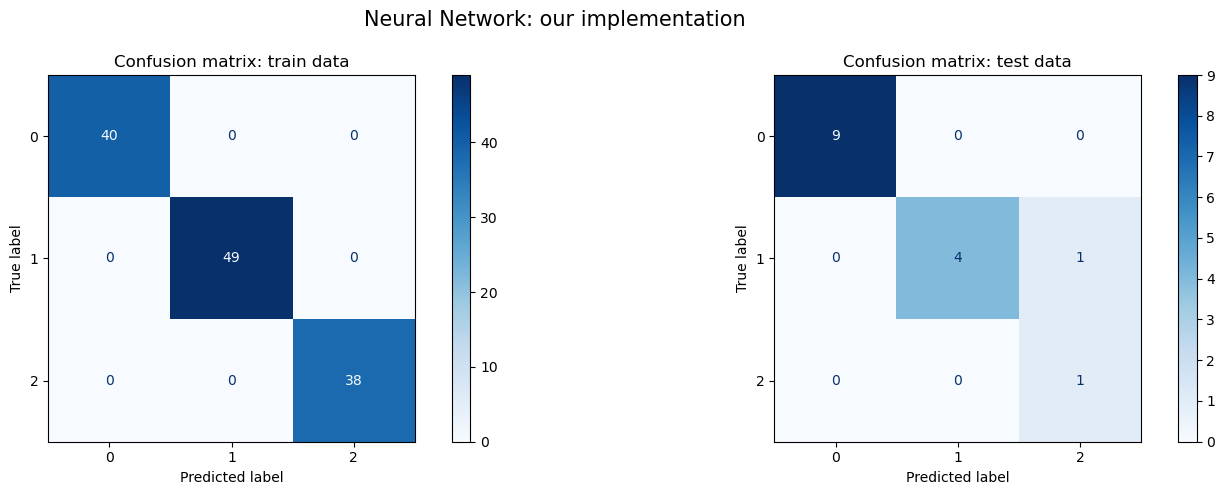

In [13]:
net_tan.nn_evaluate_one_hot(x_train=X_train_standardized, y_train=y_train, x_test=X_val_standardized, y_test=y_val, epochs=500, learning_rate=0.1)

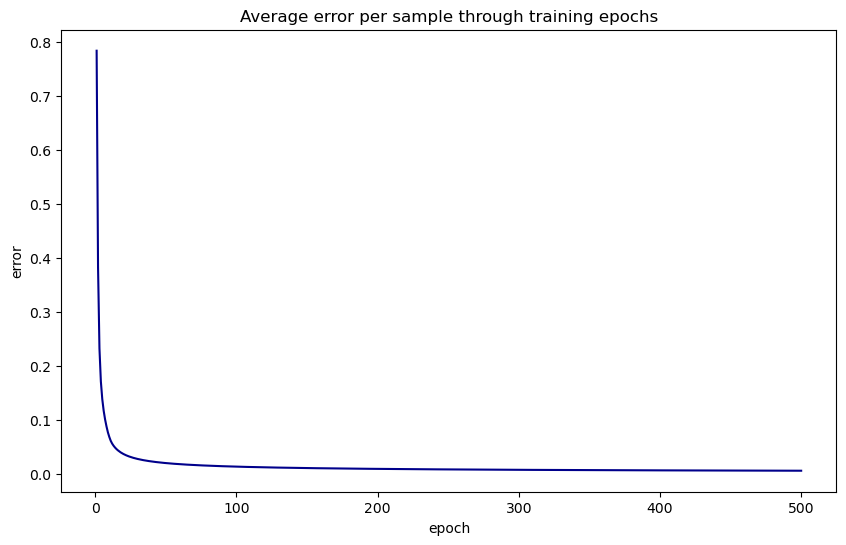

In [14]:
# network with 3 layers
net_tan= Network()
net_tan.add(FCLayer(13, 8,seed = seed))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(8,5,seed = seed))  
net_tan.add(ActivationLayer(tanh, tanh_prime))
net_tan.add(FCLayer(5, 3,seed = seed))  
net_tan.add(ActivationLayer(softmax, softmax_prime))

# train
net_tan.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect_tan = net_tan.fit(X_train_standardized, y_train, epochs=500, learning_rate=0.1)
net_tan.plot_error_curve(err_vect_tan)

##################################################
Accuracy on train:  1.0
Accuracy on test:  1.0
##################################################
Recall on train:  1.0
Recall on test:  1.0
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


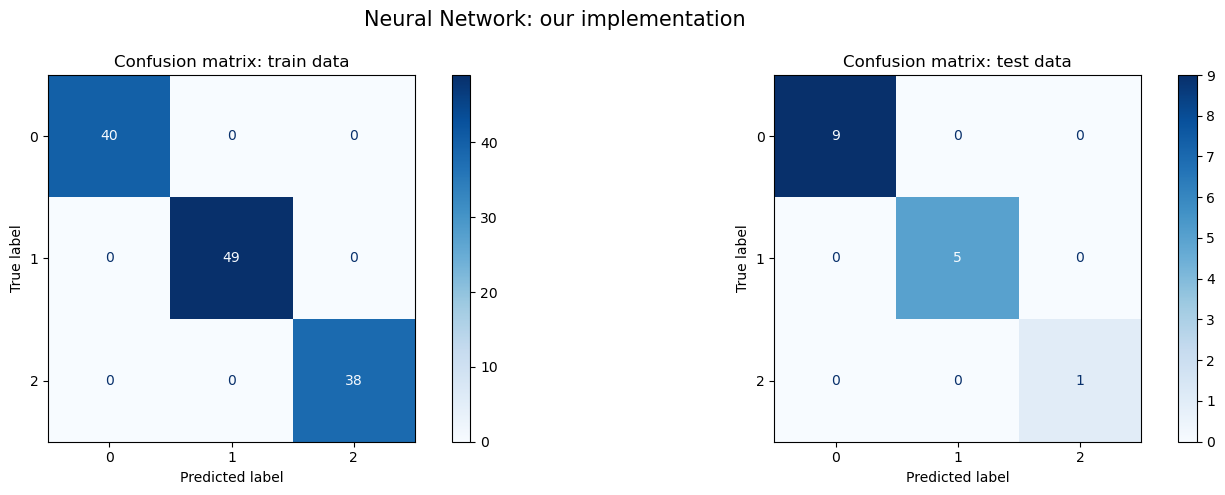

In [15]:
net_tan.nn_evaluate_one_hot(x_train=X_train_standardized, y_train=y_train, x_test=X_val_standardized, y_test=y_val, epochs=500, learning_rate=0.1)

#### Neural Network  with softmax  in the outer layer only


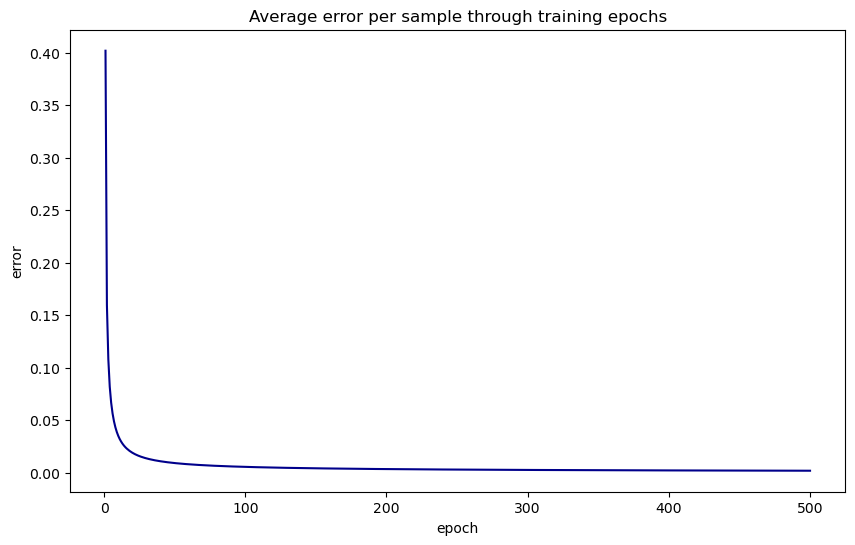

In [16]:
#network with 2 layers
net_soft = Network()
net_soft.add(FCLayer(13, 8,seed = seed))  
net_soft.add(FCLayer(8, 3,seed = seed))  
net_soft.add(ActivationLayer(softmax, softmax_prime))

# train
net_soft.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect_soft = net_soft.fit(X_train_standardized, y_train, epochs = 500,learning_rate=0.1)
net_soft.plot_error_curve(err_vect_soft)

##################################################
Accuracy on train:  1.0
Accuracy on test:  1.0
##################################################
Recall on train:  1.0
Recall on test:  1.0
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


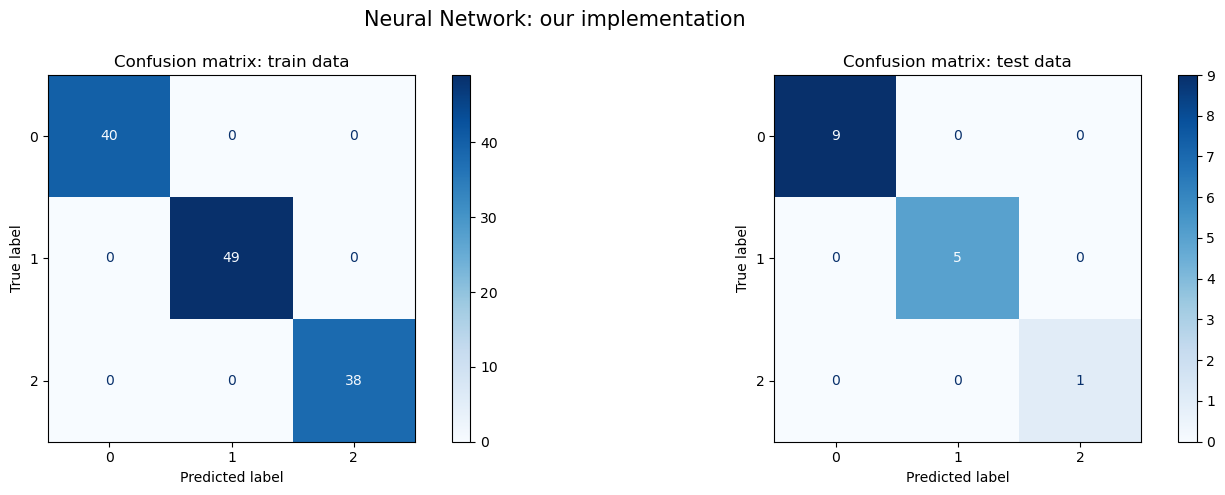

In [17]:
net_soft.nn_evaluate_one_hot(x_train= X_train_standardized, y_train=y_train, x_test=X_val_standardized, y_test=y_val, epochs=500, learning_rate=0.1)

Wanted to show overfitting due to big network, but didn't succeed. The validation curve will be added...

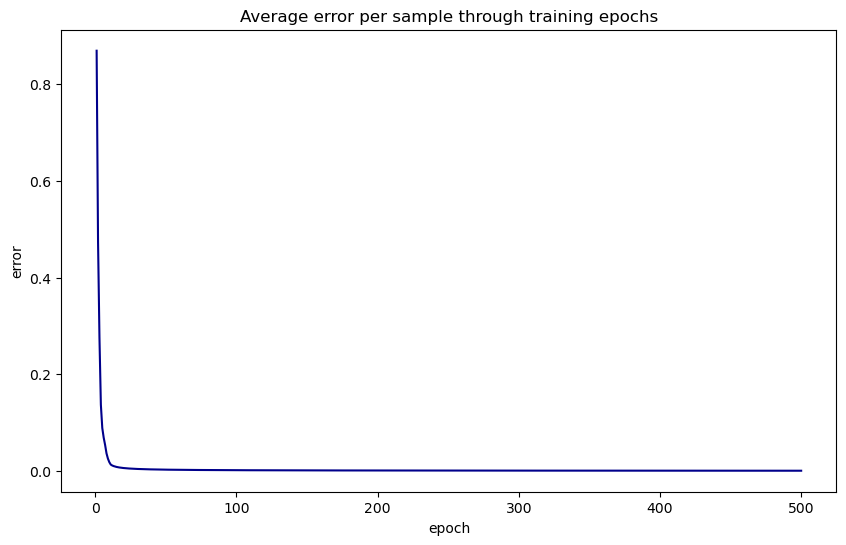

In [18]:
#network with 3+ layers
net_soft = Network()
net_soft.add(FCLayer(13, 8, seed = seed))  
net_soft.add(FCLayer(8, 5, seed = seed))  
net_soft.add(FCLayer(5, 4, seed = seed))  
net_soft.add(FCLayer(4, 4, seed = seed))  
net_soft.add(FCLayer(4, 3, seed = seed))  
net_soft.add(ActivationLayer(softmax, softmax_prime))

# train
net_soft.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect_soft = net_soft.fit(X_train_standardized, y_train, epochs=500, learning_rate=0.1)
net_soft.plot_error_curve(err_vect_soft)

##################################################
Accuracy on train:  1.0
Accuracy on test:  1.0
##################################################
Recall on train:  1.0
Recall on test:  1.0
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


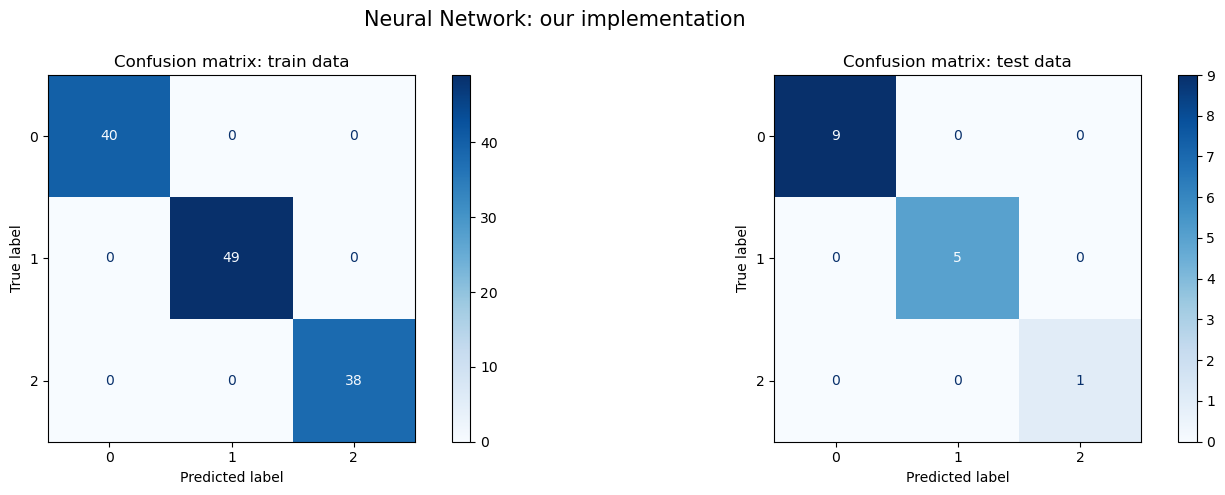

In [19]:
net_soft.nn_evaluate_one_hot(x_train=X_train_standardized, y_train=y_train, x_test=X_val_standardized, y_test=y_val, epochs=500, learning_rate=0.1)

#### The impact of initial random weightening

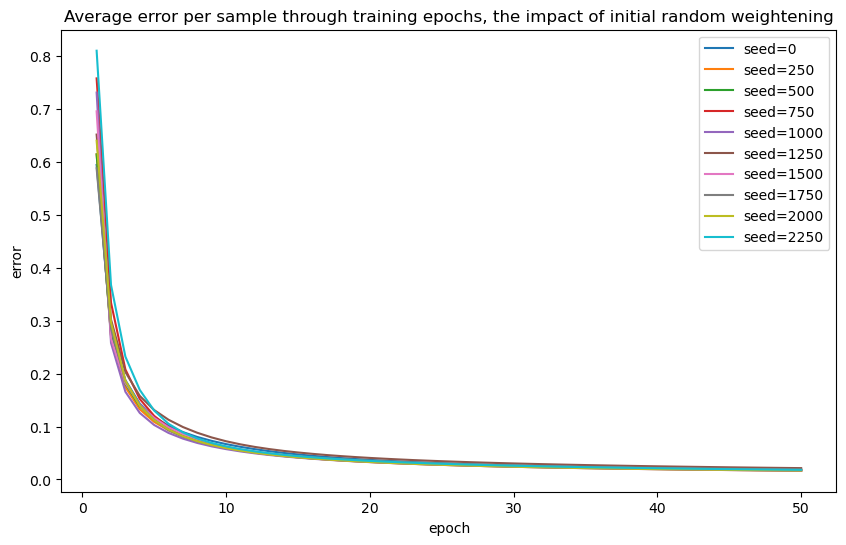

In [20]:
k = 10
plt.figure(figsize=(10, 6))
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('Average error per sample through training epochs, the impact of initial random weightening')

for i in range(0, k):
    # print(i)
    seed = i*250
    net = Network()
    net.add(FCLayer(13, 8, seed=seed))  
    net.add(ActivationLayer(tanh, tanh_prime))
    net.add(FCLayer(8, 3, seed=seed))    
    net.add(ActivationLayer(softmax, softmax_prime))

    # train
    net.use(categorical_cross_entropy, categorical_cross_entropy_prime)
    err_vect = net.fit(X_train_standardized, y_train, epochs=50, learning_rate=0.1)

    plt.plot(np.arange(1, len(err_vect)+1, 1), err_vect, '-', label='seed='+str(i*250))
plt.legend()
plt.show()



For this dataset, specific random seed for initial weightening that would result in significantly worse performans wasn't found. The plot above is only the "clean" illustration, however it was tried for bunch of other random seeds.

#### The impact of learning rate

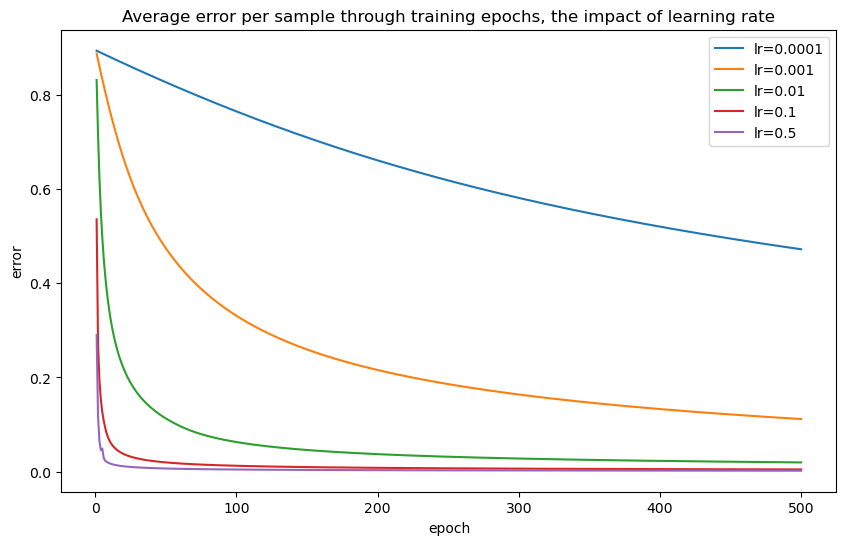

In [21]:
plt.figure(figsize=(10, 6))
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('Average error per sample through training epochs, the impact of learning rate')

lr_vect = np.array([0.0001, 0.001, 0.01, 0.1, 0.5])
k = len(lr_vect)

for i in range(0, k):
    # print(i)
    seed = 1234
    net = Network()
    net.add(FCLayer(13, 8,seed=seed))  
    net.add(ActivationLayer(tanh, tanh_prime))
    net.add(FCLayer(8, 3, seed=seed))  
    net.add(ActivationLayer(softmax, softmax_prime))

    # train
    net.use(categorical_cross_entropy, categorical_cross_entropy_prime)
    lr = lr_vect[i]
    err_vect = net.fit(X_train_standardized, y_train, epochs=500, learning_rate=lr)

    plt.plot(np.arange(1, len(err_vect)+1, 1), err_vect, '-', label='lr='+str(lr))
    
plt.legend()
plt.show()


The learning rate affects how quickly the model converges to an optimal solution. If the learning rate is too high, the model may overshoot the optimal solution and fail to converge. On the other hand, if the learning rate is too low, the convergence may be slow, and it might take a long time for the model to reach the optimal solution.
From the plot above it's apparent that lower learning rate requires greater number of training epochs in order to converge to optimal solution (smaller learning rate takes smaller steps in the parameter space, which leads to slower convergence). However, extremely fast converging to low values of loss function could be considered luck, because it could stuck in sub-optimal solution. It might happen that the model quickly found a sub-optimal solution instead of the global or better local optimum. In such cases, the model may be stuck in a sub-optimal solution and fail to explore other potentially better regions of the parameter space. That didn't happen in example here, but it's important to consider.

#### The impact of training - testing split

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


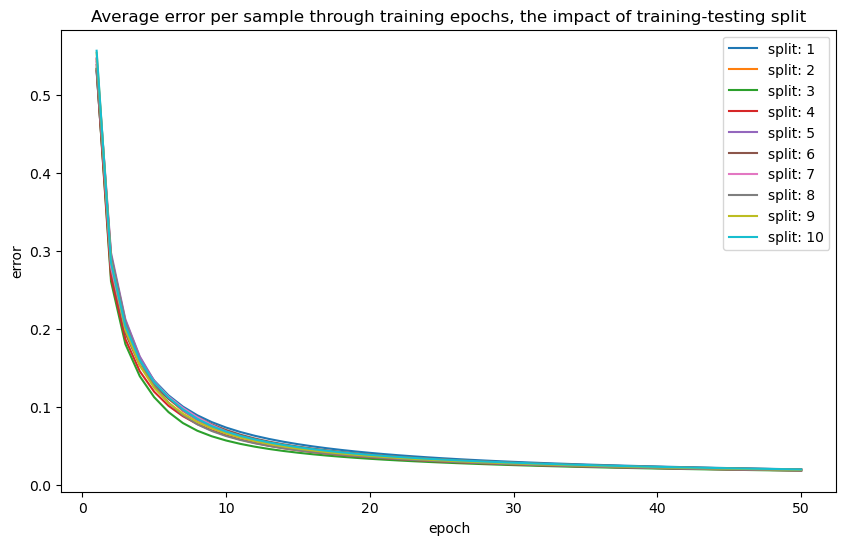

In [22]:
plt.figure(figsize=(10, 6))
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('Average error per sample through training epochs, the impact of training-testing split')

X = df_wine.drop(['class'], axis=1).to_numpy()
Y = df_wine['class']

encoder = OneHotEncoder(sparse = False)
y_reshaped = Y.to_numpy().reshape(-1,1)
y_encoded = encoder.fit_transform(y_reshaped)

k = 10

for i in range(0, k):
    #splitting into train and test set
    # print(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=i)
    #splitting into train and validation set
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=i)
    scaler = StandardScaler()
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.transform(X_test)
    X_val_standardized = scaler.transform(X_val)
    
    seed = 1234
    net = Network()
    net.add(FCLayer(13, 8, seed=seed))  
    net.add(ActivationLayer(tanh, tanh_prime))
    net.add(FCLayer(8, 3, seed=seed))    
    net.add(ActivationLayer(softmax, softmax_prime))

    # train
    net.use(categorical_cross_entropy, categorical_cross_entropy_prime)
    err_vect = net.fit(X_train_standardized, y_train, epochs=50, learning_rate=0.1)

    plt.plot(np.arange(1, len(err_vect)+1, 1), err_vect, '-', label='split: '+str(i+1))
    
plt.legend()
plt.show()


Seems like every split gives good results...

#### Loss on validation set -> validation curve

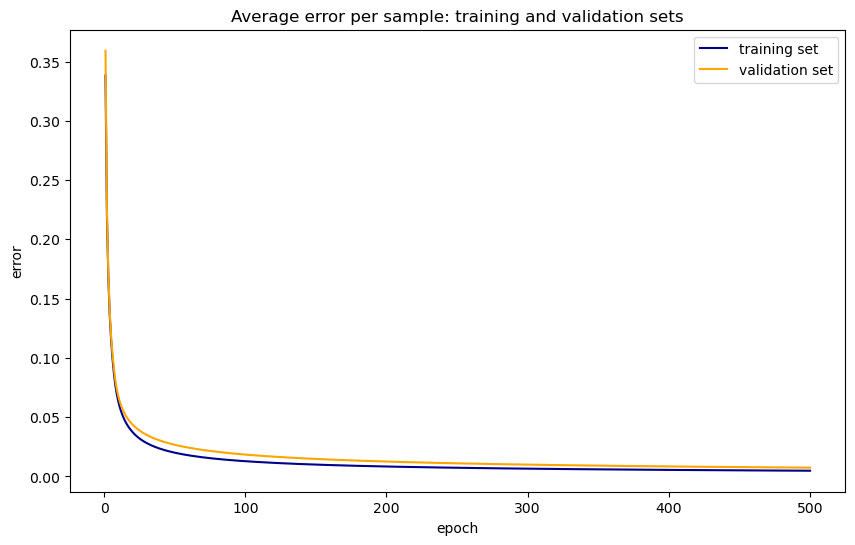

In [23]:
seed = 1234
# network with 2 layers
net = Network()
net.add(FCLayer(13, 8, seed=seed))  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(8, 3, seed=seed))  
net.add(ActivationLayer(softmax, softmax_prime))

# train
net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect_train, err_vect_val = net.fit_plus_validation(X_train_standardized, y_train, X_val_standardized, y_val, epochs=500, learning_rate=0.1)


plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(err_vect_train)+1, 1), err_vect_train, '-', color='darkblue', label='training set')
plt.plot(np.arange(1, len(err_vect_val)+1, 1), err_vect_val, '-', color='orange', label='validation set')

plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()
plt.title('Average error per sample: training and validation sets')
plt.show()

It was expected that overfitting would be present in later epochs of training, so validation curve was plotted. but there is no such point where the error on validation set rises.

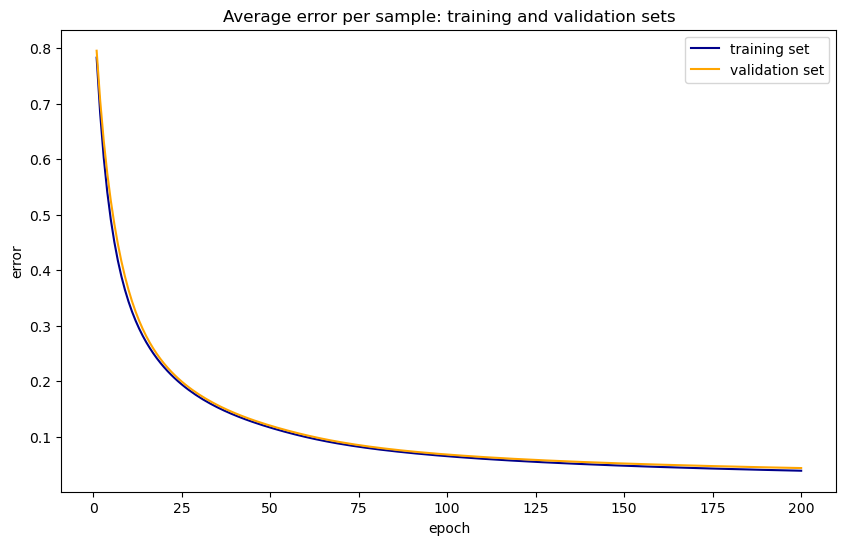

In [24]:
# smaller number of training epochs + lower lr
seed = 1234
# network with 2 layers
net = Network()
net.add(FCLayer(13, 8, seed=seed))  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(8, 3, seed=seed))  
net.add(ActivationLayer(softmax, softmax_prime))

# train
net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect_train, err_vect_val = net.fit_plus_validation(X_train_standardized, y_train, X_val_standardized, y_val, epochs=200, learning_rate=0.01)


plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(err_vect_train)+1, 1), err_vect_train, '-', color='darkblue', label='training set')
plt.plot(np.arange(1, len(err_vect_val)+1, 1), err_vect_val, '-', color='orange', label='validation set')

plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()
plt.title('Average error per sample: training and validation sets')
plt.show()

#### Batch approach
Until now incremental approach was performed and weights were updated after every training sample. Let's propagate whole training set now and after that update the weights.

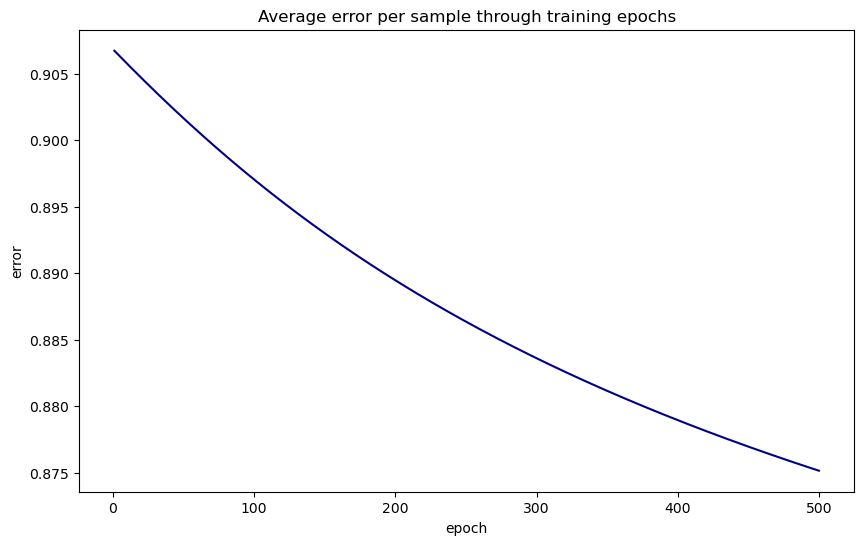

In [25]:
seed = 1234
net = Network()
net.add(FCLayer(13, 8, seed=seed))  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(8, 3, seed=seed))  
net.add(ActivationLayer(softmax, softmax_prime))


# train
net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect = net.fit_batch(X_train_standardized, y_train, epochs=500, learning_rate=0.01)
net.plot_error_curve(err_vect)

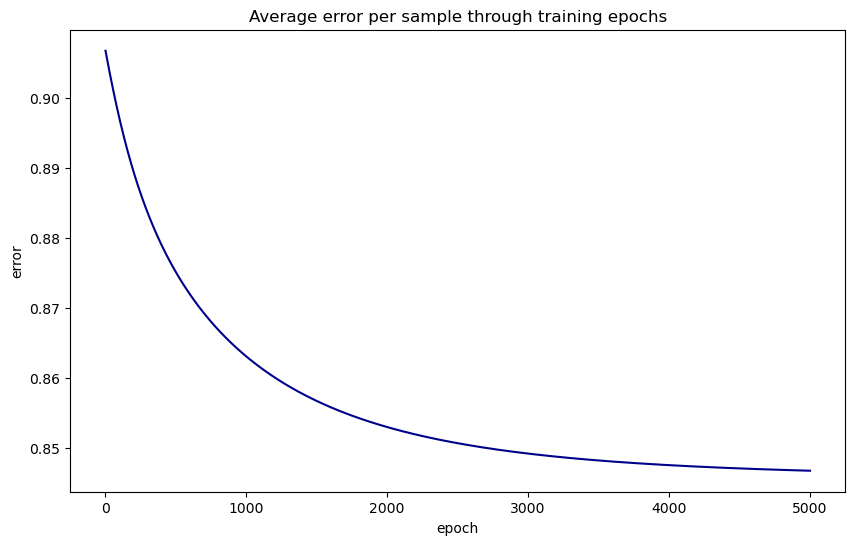

In [26]:
# greater number of epochs
seed = 1234
net = Network()
net.add(FCLayer(13, 8, seed=seed))  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(8, 3, seed=seed))  
net.add(ActivationLayer(softmax, softmax_prime))

# train
net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect = net.fit_batch(X_train_standardized, y_train, epochs=5000, learning_rate=0.01)
net.plot_error_curve(err_vect)

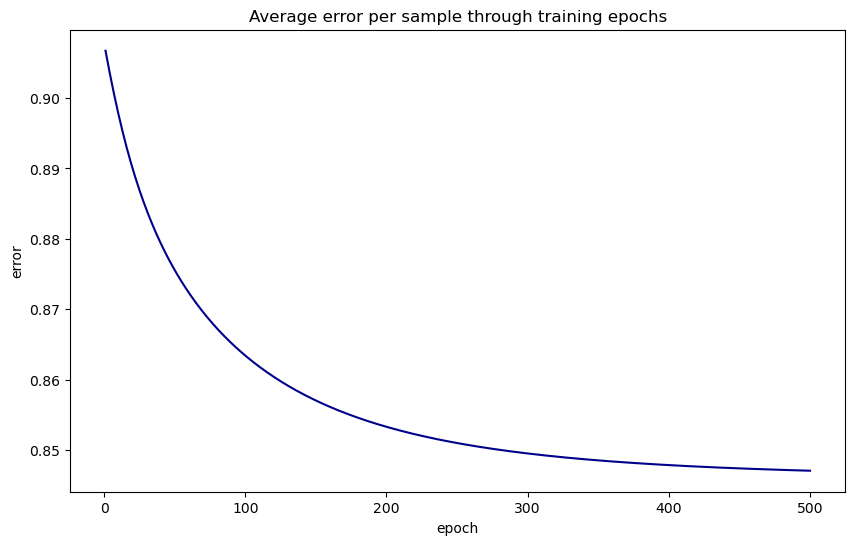

In [27]:
# greater learning rate
seed = 1234
net = Network()
net.add(FCLayer(13, 8, seed=seed))  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(8, 3, seed=seed))  
net.add(ActivationLayer(softmax, softmax_prime))


# train
net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect = net.fit_batch(X_train_standardized, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

#### Mini-batch approach

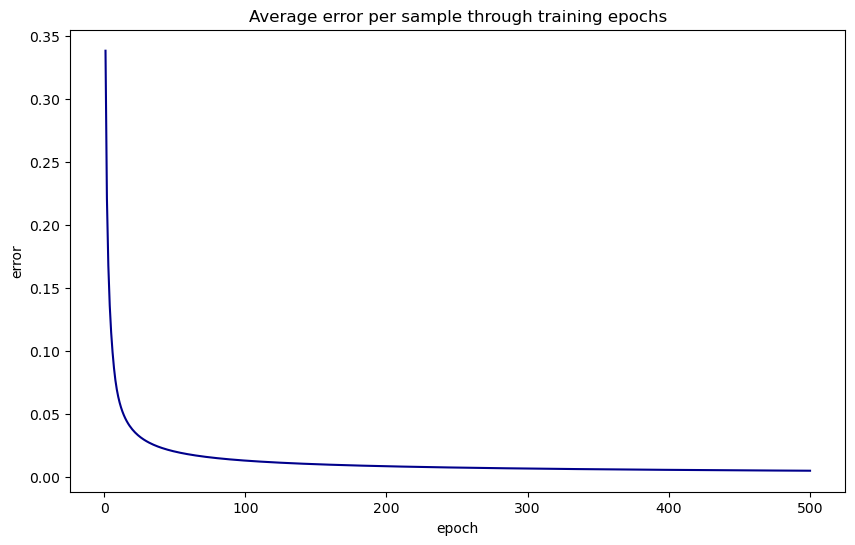

In [28]:
# Examining mini-batch method: for batch_size=1 it should give the same output as standard incremental (fit)
seed = 1234
net = Network()
net.add(FCLayer(13, 8, seed=seed))  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(8, 3, seed=seed))  
net.add(ActivationLayer(softmax, softmax_prime))

# train
net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect = net.fit_mini_batch(X_train_standardized, y_train, epochs=500, learning_rate=0.1, batch_size=1)
net.plot_error_curve(err_vect)

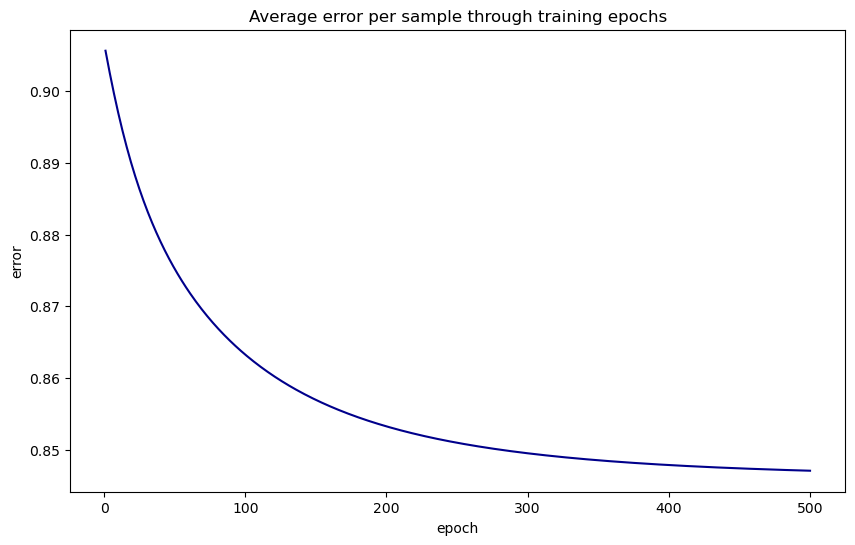

In [29]:
# Examining mini-batch method: for batch_size=num_samples it should give the same output as batch_fit
seed = 1234
net = Network()
net.add(FCLayer(13, 8, seed=seed))  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(8, 3, seed=seed))  
net.add(ActivationLayer(softmax, softmax_prime))

# train
net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

num_samples = X_train_standardized.shape[0]
err_vect = net.fit_mini_batch(X_train_standardized, y_train, epochs=500, learning_rate=0.1, batch_size=num_samples)
net.plot_error_curve(err_vect)

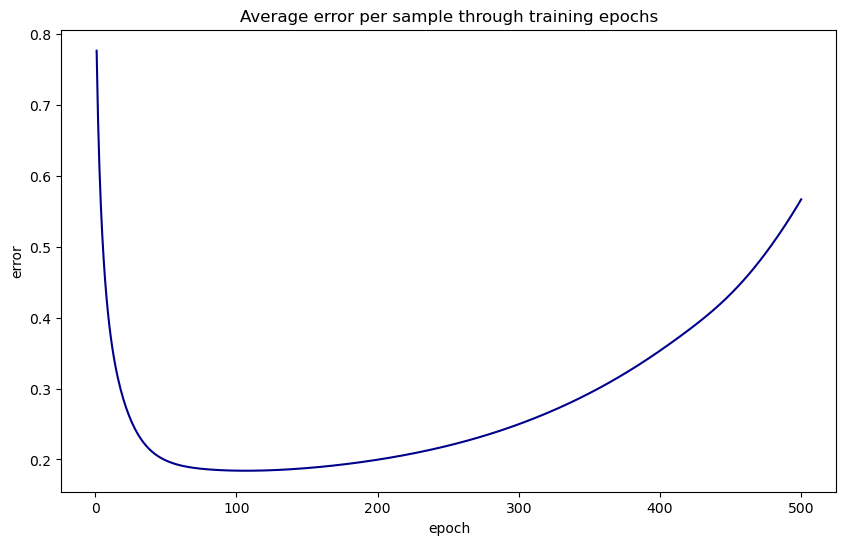

In [30]:
seed = 1234
net = Network()
net.add(FCLayer(13, 8, seed=seed))  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(8, 3, seed=seed))  
net.add(ActivationLayer(softmax, softmax_prime))

# train
net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

num_samples = X_train_standardized.shape[0]
err_vect = net.fit_mini_batch(X_train_standardized, y_train, epochs=500, learning_rate=0.1, batch_size=4)
net.plot_error_curve(err_vect)

Note: for batch_size >= 5, the algorithm is diverging...

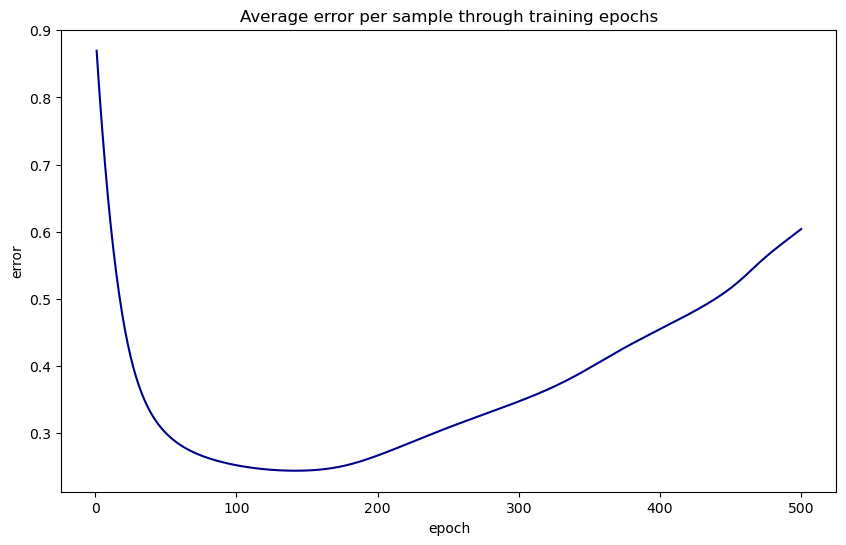

In [31]:
seed = 1234
net = Network()
net.add(FCLayer(13, 8, seed=seed))  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(8, 3, seed=seed))  
net.add(ActivationLayer(softmax, softmax_prime))

# train
net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

num_samples = X_train_standardized.shape[0]
err_vect = net.fit_mini_batch(X_train_standardized, y_train, epochs=500, learning_rate=0.1, batch_size=5)
net.plot_error_curve(err_vect)

### Regularization with Ridge

Up until now it is evident that our model is prone to overfitting. Therefore, we decided to use Ridge as a regularization technique. Ridge could help our model reduce overfitting and could lead to more generalization. Since it also encourages smaller weights by shrinking them towards zero, it also may contribute to a reduced model complexity.

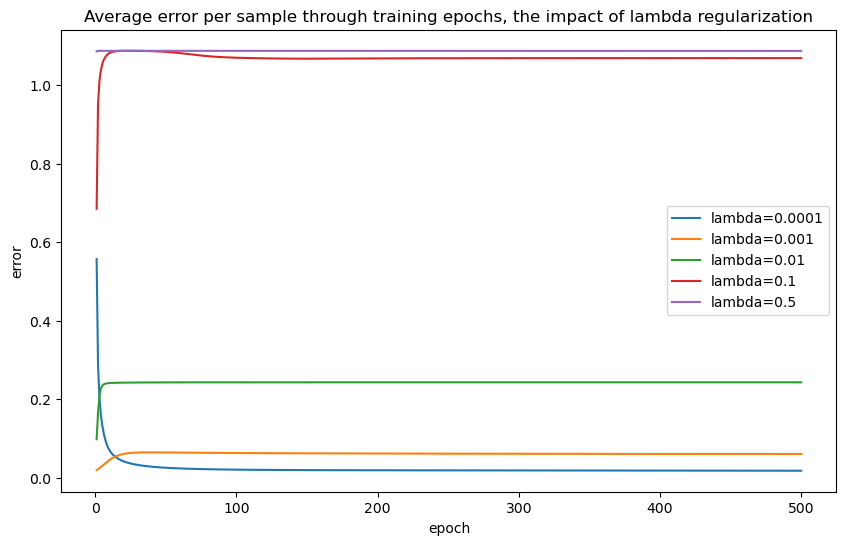

In [32]:
seed = 1234
net = Network()
net.add(FCLayer(13, 8,seed=seed))  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(8, 3, seed=seed))  
net.add(ActivationLayer(softmax, softmax_prime))

plt.figure(figsize=(10, 6))
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('Average error per sample through training epochs, the impact of lambda regularization')

lambda_vect = np.array([0.0001, 0.001, 0.01, 0.1, 0.5])
k = len(lambda_vect)

for i in range(0, k):
    # print(i)
    # train
    net.use(categorical_cross_entropy, categorical_cross_entropy_prime)
    l = lambda_vect[i]
    err_vect = net.fit_plus_ridge(X_train_standardized, y_train, epochs=500, learning_rate=0.1, reg_lambda = l)

    plt.plot(np.arange(1, len(err_vect)+1, 1), err_vect, '-', label='lambda='+str(l))
    
plt.legend()
plt.show()


The train error plot is highly influenced by the value of the lambda parameter. As seen below, when lambda is too low, the regularization effect is very minimal and the training error shows a decreasing tendence. Moreover, the blue plot (lambda = 0.0001) is quite similar to our other initial plots above due to lambda being almost 0. On the other side, as lambda increases, the training error also increases and the model may be prone to underfitting.

### Randomized search with CV to find the best parameter combination

In [33]:
#parameter grid
params = {
    'hidden_layer_size': [2,3,4,5,6],
    'activation': ['tanh+softmax','softmax'],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.5],
    'reg_lambda' : [0.0001, 0.001, 0.005,0.01,0.05, 0.1, 0.5,1],
    'epochs': [200, 500,700,1000],
    'node_numbers' : [5,8,10,12,15]
}

input_size = 13
output_size = 3
seed = 1234
accuracy_dict = {}
best_accuracy = 0
best_parms = {}

In [34]:
start = time.time()
random.seed(seed)
#we are going to perform randomized search for 10 randomly chosen parameter combinations
for i in range(10):
    layers = random.sample(params['hidden_layer_size'], 1)[0]
    activation = random.sample(params['activation'], 1)[0]
    learning_rate = random.sample(params['learning_rate'], 1)[0]
    nodes = random.sample(params['node_numbers'], 1)[0]
    epochs = random.sample(params['epochs'], 1)[0]
    reg_lambda =  random.sample(params['reg_lambda'], 1)[0]
    # print(layers,activation,learning_rate,nodes,epochs, reg_lambda)
    
    kf = KFold(n_splits=5, shuffle=True,random_state = seed)
    accuracy_scores = []
    for train_index, val_index in kf.split(X_train):
        # Split the data into training and validation sets
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        X_train_fold = scaler.fit_transform(X_train_fold)
        X_val_fold = scaler.transform(X_val_fold)
        # Initialize and train your neural network with the current hyperparameters
        net = Network()
        net.add(FCLayer(input_size, nodes,seed = seed))
        if activation == 'softmax':
            for _ in range(layers - 1):
                net.add(FCLayer(nodes, nodes,seed = seed))
        else:
            net.add(ActivationLayer(tanh, tanh_prime))
            for _ in range(layers - 1):
                net.add(FCLayer(nodes, nodes,seed = seed))
                net.add(ActivationLayer(tanh, tanh_prime))
        net.add(FCLayer(nodes, output_size,seed = seed))
        net.add(ActivationLayer(softmax, softmax_prime))
        net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

        
        net.fit_plus_ridge(X_train_fold, y_train_fold, epochs=epochs, learning_rate=learning_rate,reg_lambda = reg_lambda)
        y_val_pred = net.predict(X_val_fold)
        y_val_pred = np.concatenate(y_val_pred)

        # Convert one-hot encoded predictions back to class labels
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        y_val_labels = np.argmax(y_val_fold, axis=1)

        accuracy = accuracy_score(y_val_labels,y_val_pred_labels) 
        accuracy_scores.append(accuracy)
    avg_accuracy = np.mean(accuracy_scores)
    if avg_accuracy > best_accuracy:
                    best_accuracy = avg_accuracy
                    best_params = {
                        'hidden_layer_size': layers,
                        'number_of_nodes':nodes,
                        'activation': activation,
                        'learning_rate': learning_rate,
                        'epochs':epochs,
                        'reg_lambda':reg_lambda}
    
    accuracy_dict[(layers,activation,nodes,learning_rate,reg_lambda,epochs)] = accuracy_scores

end = time.time()

In [35]:
print("Time needed to run cross validation for best parameter combination "+ str((end-start)/60)+ " minutes.")


Time needed to run cross validation for best parameter combination 10.18434583346049 minutes.


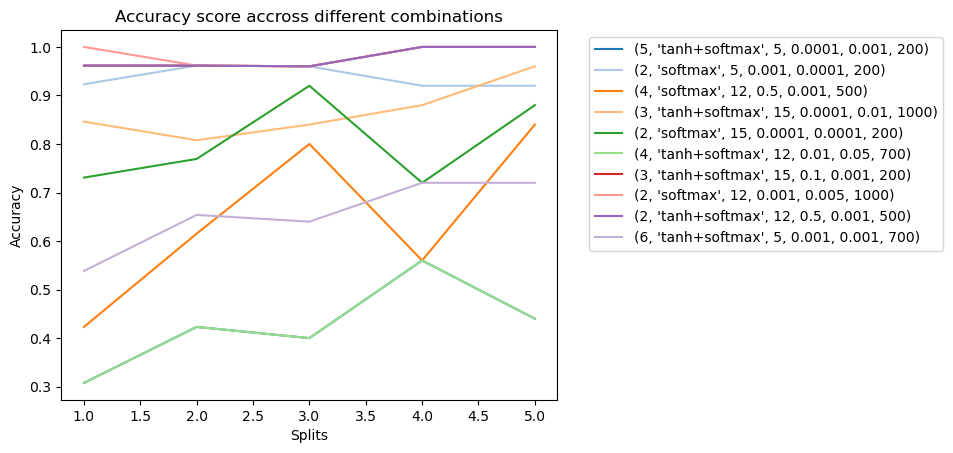

In [36]:
cmap = plt.get_cmap('tab20')
for i,c in enumerate(accuracy_dict):
   color = cmap(i)
   plt.plot(np.arange(1, len(accuracy_dict[c])+1, 1), accuracy_dict[c], '-', label=str(c),color = color)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Accuracy score accross different combinations")
plt.ylabel('Accuracy')
plt.xlabel('Splits')
plt.show()

In [37]:
print(f'The highest accuracy {best_accuracy} was achieved with the following parameters:\n {best_params}')

The highest accuracy 0.9843076923076923 was achieved with the following parameters:
 {'hidden_layer_size': 2, 'number_of_nodes': 12, 'activation': 'softmax', 'learning_rate': 0.001, 'epochs': 1000, 'reg_lambda': 0.005}


##### Testing best model on test set

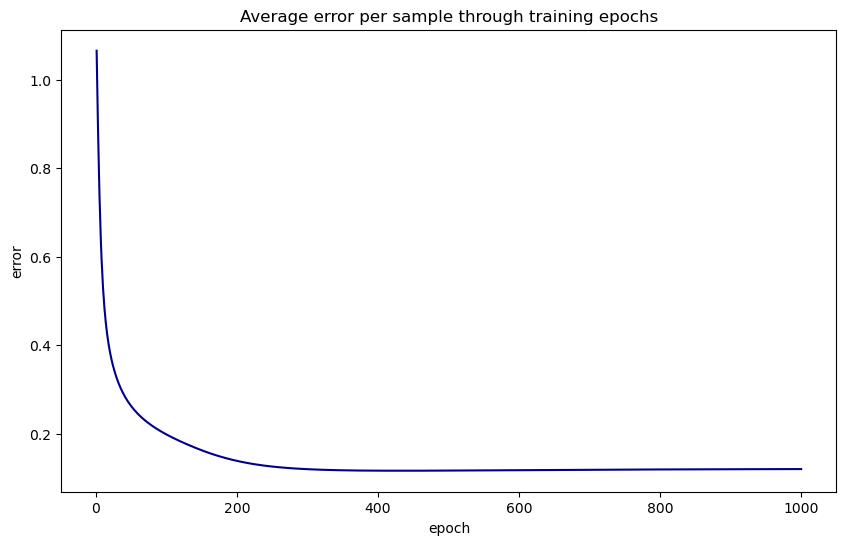

In [38]:
start_time = time.time()
net = Network()
net.add(FCLayer(13, 12,seed = seed))
net.add(FCLayer(12, 12,seed = seed))  
net.add(FCLayer(12, 12,seed = seed)) 
net.add(FCLayer(12, 3,seed = seed))  
net.add(ActivationLayer(softmax, softmax_prime))

net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

err_vect = net.fit_plus_ridge(X_train_standardized, y_train, epochs = 1000,learning_rate=0.001,reg_lambda = 0.005)
runtime_nnw_scratch = time.time() - start_time

net.plot_error_curve(err_vect)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9722222222222222
##################################################
Recall on train:  1.0
Recall on test:  0.9722222222222222
##################################################
Precision on train:  1.0
Precision on test:  0.9722222222222222
##################################################


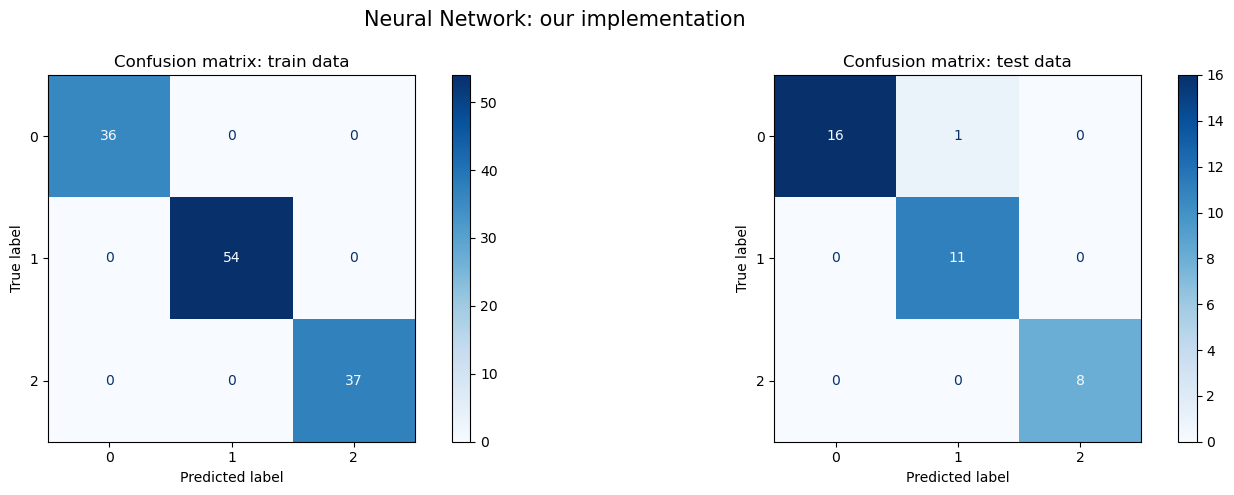

In [39]:
net.nn_evaluate_one_hot(x_train= X_train_standardized, y_train=y_train, x_test=X_test_standardized, y_test=y_test, epochs = 1000,learning_rate=0.001, reg_lambda = 0.005, mode='ridge')

### Comparison: effectiveness & efficiency (for the best model)

In [40]:
net = Network()
net.add(FCLayer(13, 12,seed = seed))
net.add(FCLayer(12, 12,seed = seed))  
net.add(FCLayer(12, 12,seed = seed)) 
net.add(FCLayer(12, 3,seed = seed))  
net.add(ActivationLayer(softmax, softmax_prime))

# train
net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

num_samples = y_train.shape[0]
batch_size_vect = np.array([2, 3, 4, 5, 10])
combinations = len(batch_size_vect) + 2

acc_train = np.zeros(combinations)
acc_test = np.zeros(combinations)
elapsed_time = np.zeros(combinations)


# 0. incremental approach
start = time.time()
acc_train[0], acc_test[0] = net.nn_evaluate_one_hot_without_plotting(x_train= X_train_standardized, y_train=y_train, x_test=X_test_standardized, y_test=y_test, epochs = 1000,learning_rate=0.001,reg_lambda = 0.005,mode = 'ridge')
end = time.time()
elapsed_time[0] = end - start

# mini-batch approach
for i in range(0, len(batch_size_vect)):
    print(i)
    net = Network()
    net.add(FCLayer(13, 12,seed = seed))
    net.add(FCLayer(12, 12,seed = seed))  
    net.add(FCLayer(12, 12,seed = seed)) 
    net.add(FCLayer(12, 3,seed = seed))  
    net.add(ActivationLayer(softmax, softmax_prime))

    # train
    net.use(categorical_cross_entropy, categorical_cross_entropy_prime)

    batch_size = batch_size_vect[i]
    start = time.time()
    acc_train[i+1], acc_test[i+1] = net.nn_evaluate_one_hot_without_plotting(X_train_standardized, y_train, X_test_standardized, y_test, epochs=1000, learning_rate=0.001, mode='mini_batch', batch_size=batch_size,batch_mode = 'ridge',reg_lambda = 0.05)
    end = time.time()
    elapsed_time[i+1] = end - start
    
    
net = Network()
net.add(FCLayer(13, 12,seed = seed))
net.add(FCLayer(12, 12,seed = seed))  
net.add(FCLayer(12, 12,seed = seed)) 
net.add(FCLayer(12, 3,seed = seed))  
net.add(ActivationLayer(softmax, softmax_prime))

# train
net.use(categorical_cross_entropy, categorical_cross_entropy_prime)
# batch approach
start = time.time()
acc_train[combinations-1], acc_test[combinations-1] = net.nn_evaluate_one_hot_without_plotting(X_train_standardized, y_train, X_test_standardized, y_test, epochs=1000, learning_rate=0.001, mode='batch',batch_mode ='ridge',reg_lambda = 0.05)
end = time.time()
elapsed_time[combinations-1] = end - start

0
1
2
3
4


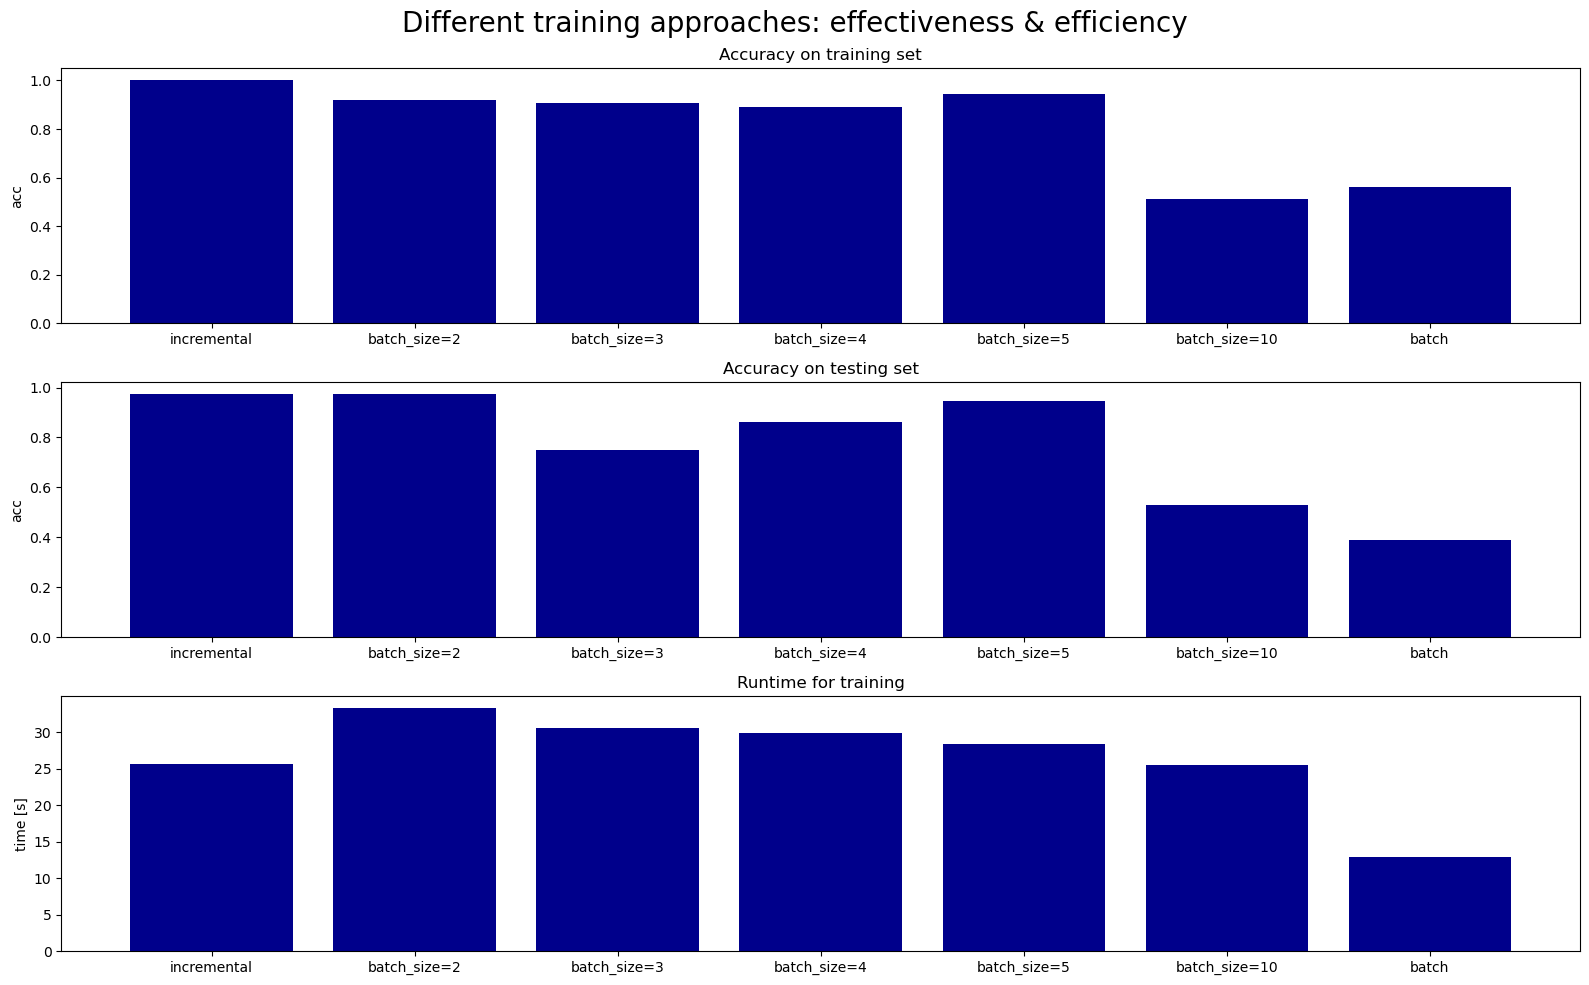

In [41]:
cat = ['incremental', 'batch_size=2', 'batch_size=3', 'batch_size=4', 'batch_size=5', 'batch_size=10', 'batch']
fig, axs = plt.subplots(3, 1, figsize=(16, 10))

axs[0].bar(cat, acc_train, color='darkblue')
axs[0].set_title('Accuracy on training set')
axs[0].set_ylabel('acc')

# Second subplot
axs[1].bar(cat, acc_test, color='darkblue')
axs[1].set_title('Accuracy on testing set')
axs[1].set_ylabel('acc')

# Third subplot
axs[2].bar(cat, elapsed_time, color='darkblue')
axs[2].set_title('Runtime for training')
axs[2].set_ylabel('time [s]')

plt.suptitle('Different training approaches: effectiveness & efficiency', fontsize=20)
plt.tight_layout()
plt.show()

## Tensor Flow implementation

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from openml import tasks, datasets

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import time
tf.random.set_seed(1234)

In [55]:
def evaluate(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    # accuracy
    print("#"*20)
    print("Accuracy on train: {:.2f} %".format(accuracy_score(y_train, y_train_predict)*100))
    print("Accuracy on test: {:.2f} %".format(accuracy_score(y_test, y_test_predict)*100))
    print("#"*20)
    print("Recall on train: {:.2f} %".format(recall_score(y_train, y_train_predict, average = 'macro')*100))
    print("Recall on test: {:.2f} %".format(recall_score(y_test, y_test_predict, average = 'macro')*100))
    print("#"*20)
    print("Precision on train: {:.2f} %".format(precision_score(y_train, y_train_predict, average = 'macro')*100))
    print("Precision on test: {:.2f} %".format(precision_score( y_test, y_test_predict, average = 'macro')*100))

    print("#"*20)

    # plot confusion matrices
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    c_1 = confusion_matrix(y_true=y_train, y_pred=y_train_predict)
    cmd_1 = ConfusionMatrixDisplay(c_1, display_labels=['class 1', 'class 2', 'class 3'])
    cmd_1.plot(ax=ax[0], cmap=plt.cm.Blues)
    ax[0].set_title("Confusion matrix: train data")

    c_2 = confusion_matrix(y_true=y_test, y_pred=y_test_predict)
    cmd_2 = ConfusionMatrixDisplay(c_2, display_labels=['class 1','class 2','class 3'])
    cmd_2.plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title("Confusion matrix: test data")

    plt.show()

In [45]:
X = df_wine.drop(['class'], axis=1)
y = df_wine['class']

In [46]:
# Split the dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)

# for sparse_categorical_crossentropy, the values must be integers. The count of the categories starts with 0 -> 1,2,3 must be converted to 0,1,2
y_train = y_train.astype(int)-1
y_test = y_test.astype(int)-1
y_val = y_val.astype(int)-1

# Standardize the features
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_val_scale = scaler.transform(X_val)
X_test_scale = scaler.transform(X_test)

In [47]:
# Define and train a simple neural network using TensorFlow

"""x_train= X_train_standardized, y_train=y_train, x_test=X_test_standardized, y_test=y_test, epochs = 1000,learning_rate=0.001, reg_lambda = 0.005, mode='ridge'"""
start_time = time.time()
L2_reg = tf.keras.regularizers.l2(0.005) # ridge regularization

model_simple = Sequential([
    Dense(12, activation='tanh', input_shape=(X_train.shape[1],), kernel_regularizer=L2_reg),
    Dense(12, activation='tanh', kernel_regularizer=L2_reg),
    Dense(12, activation='tanh', kernel_regularizer=L2_reg),
    Dense(3, activation='softmax')
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.001)  # loss function - necessary to instanciate for learning_rate

model_simple.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_simple = model_simple.fit(X_train_scale, y_train, validation_data=(X_val_scale, y_val), epochs=1000, verbose=0)
runtime_simple = time.time() - start_time

# Evaluate the simple model on the validation set
y_pred_simple = model_simple.predict(X_val)
y_pred_simple = np.argmax(y_pred_simple, axis=1)
accuracy_simple = accuracy_score(y_val, y_pred_simple)


1/1 [==============================] - 0s 100ms/step


<Axes: >

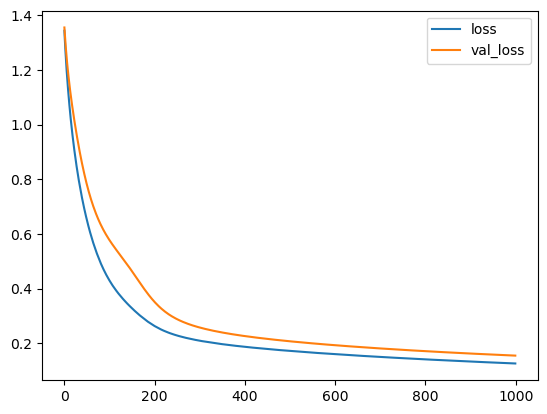

In [48]:
df_history_simple = pd.DataFrame(history_simple.history)
df_history_simple.loc[:, ['loss', 'val_loss']].plot()

In [49]:
# Define and train a more sophisticated neural network using TensorFlow

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    min_delta=0.0001,  # minimum amount of change to count as an improvement
    patience=20,  # how many epochs wait before stopping
    restore_best_weights=True)

start_time = time.time()
model_advanced = tf.keras.models.Sequential([
    Dense(12, activation='tanh', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    Dense(12, activation='tanh'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    Dense(12, activation='tanh'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    Dense(12, activation='tanh'),
    Dense(12, activation='tanh'),
    Dense(3, activation='softmax')
])

model_advanced.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_advanced = model_advanced.fit(X_train_scale, y_train, validation_data=(X_val_scale, y_val), epochs=1000, verbose=0, callbacks=[early_stopping])

runtime_advanced = time.time() - start_time

# Evaluate the sophisticated model on the validation set
y_pred_advanced = model_advanced.predict(X_val)
y_pred_advanced = np.argmax(y_pred_advanced, axis=1)
accuracy_advanced = accuracy_score(y_val, y_pred_advanced)


1/1 [==============================] - 0s 107ms/step


<Axes: >

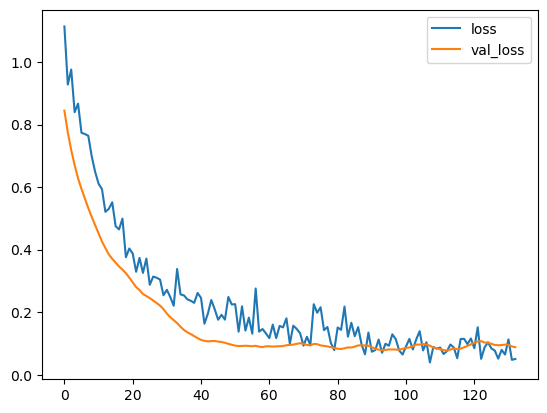

In [50]:
df_history_advanced = pd.DataFrame(history_advanced.history)
df_history_advanced.loc[:, ['loss', 'val_loss']].plot()

## XGBoost impplementation
XGBoost stands for eXtreme Gradient Boosting and is a powerful state of the art ML method that uses an esamble of combined weak lerners (decision trees)


In [51]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)
# for sparse_categorical_crossentropy, the values must be integers. The count of the categories starts with 0 -> 1,2,3 must be converted to 0,1,2
y_train = y_train.astype(int)-1
y_test = y_test.astype(int)-1
y_val = y_val.astype(int)-1

In [53]:
# define parameter for grid search
param_grid = {
    'max_depth': [3,5,7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'seed': [1234]
}

# create model instance
model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)))

# perform grid search with cross validateion
xgb_grid = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=1
)

xgb_grid.fit(X_train, y_train)

xgb_best_params = xgb_grid.best_params_
print('Best Hyperparameters:', xgb_best_params)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'seed': 1234, 'subsample': 0.8}


####################
Accuracy on train: 100.00 %
Accuracy on test: 94.44 %
####################
Recall on train: 100.00 %
Recall on test: 96.08 %
####################
Precision on train: 100.00 %
Precision on test: 93.94 %
####################


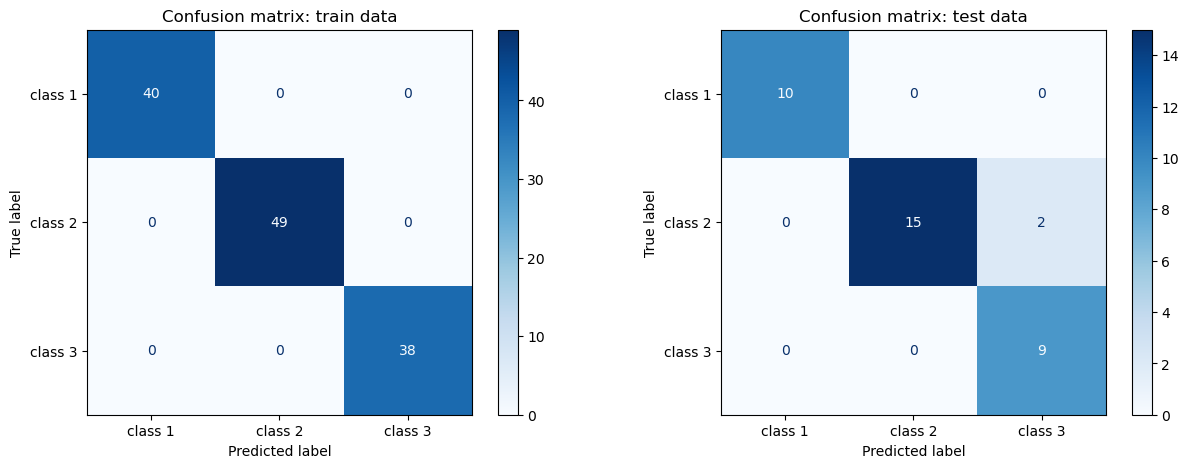

In [56]:
xgb_best_params['early_stopping_rounds'] = 10
xgb_best_params['n_estimators'] = 100

start_time = time.time()
model_xgb = model_xgb.set_params(**xgb_best_params)


model_xgb.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              verbose=0)
runtime_xgb = time.time() - start_time

y_pred_xgb = model_xgb.predict(X_test)
evaluate(model_xgb, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

### Pipeline for cross-validation

In [57]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss

xgb_cv_params = {
    'colsample_bytree': xgb_best_params['colsample_bytree'],
    'learning_rate': xgb_best_params['colsample_bytree'],
    'max_depth': xgb_best_params['max_depth'],
    'subsample': xgb_best_params['subsample'],
    'n_estimators': 100
}


kf = KFold(n_splits=5, shuffle=True)

loss_score_simple_val = []
loss_score_advanced_val = []
accuracy_score_simple_val = []
accuracy_score_advanced_val = []
loss_score_xgb_val = []
accuracy_score_xgb_val = []

loss_score_simple_test = []
loss_score_advanced_test = []
accuracy_score_simple_test = []
accuracy_score_advanced_test = []
loss_score_xgb_test = []
accuracy_score_xgb_test = []

model_simple_cv = model_simple
model_advanced_cv = model_advanced
model_xgb_cv = xgb.XGBClassifier(**xgb_cv_params)

for train_index, val_index in kf.split(X):
    # preprocessing
    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
    # for sparse_categorical_crossentropy, the values must be integers. The count of the categories starts with 0 -> 1,2,3 must be converted to 0,1,2
    y_train = y_train.astype(int)-1
    y_test = y_test.astype(int)-1
    y_val = y_val.astype(int)-1

    # Standardize the features
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    X_test_scale = scaler.transform(X_test)  
    
    model_simple_cv.fit(X_train_scale, y_train, validation_data=(X_val_scale, y_val), epochs=1000, verbose=0)
    model_advanced_cv.fit(X_train_scale, y_train, validation_data=(X_val_scale, y_val), epochs=1000, verbose=0, callbacks=[early_stopping])
    model_xgb_cv.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)
    
    # validation metrics for simple and advanced model
    loss_simple_val, accuracy_simple_val = model_simple_cv.evaluate(X_val_scale, y_val, verbose=0)
    loss_advanced_val, accuracy_advanced_val = model_advanced_cv.evaluate(X_val_scale, y_val, verbose=0)
    loss_score_simple_val.append(loss_simple_val)
    loss_score_advanced_val.append(loss_advanced_val)
    accuracy_score_simple_val.append(accuracy_simple_val)
    accuracy_score_advanced_val.append(accuracy_advanced_val)
    
    # test metrics for simple and advanced model
    loss_simple_test, accuracy_simple_test = model_simple_cv.evaluate(X_test_scale, y_test, verbose=0)
    loss_advanced_test, accuracy_advanced_test = model_advanced_cv.evaluate(X_test_scale, y_test, verbose=0)
    loss_score_simple_test.append(loss_simple_test)  # maybe 0
    loss_score_advanced_test.append(loss_advanced_test)  # maybe 0
    accuracy_score_simple_test.append(accuracy_simple_test)
    accuracy_score_advanced_test.append(accuracy_advanced_test)
    
    # calculating loss for xgb
    probs_val = model_xgb_cv.predict_proba(X_val)
    loss_xgb_val = log_loss(y_val, probs_val)
    y_pred_xgb_val = model_xgb_cv.predict(X_val)
    accuracy_xgb_val = accuracy_score(y_val, y_pred_xgb_val)
    loss_score_xgb_val.append(loss_xgb_val)
    accuracy_score_xgb_val.append(accuracy_xgb_val)
    
    probs_test = model_xgb_cv.predict_proba(X_test)
    loss_xgb_test = log_loss(y_test, probs_test)
    y_pred_xgb_test = model_xgb_cv.predict(X_test)
    accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb_test)
    loss_score_xgb_test.append(loss_xgb_test)
    accuracy_score_xgb_test.append(accuracy_xgb_test)
    
    
avg_loss_simple_val = np.mean(loss_score_simple_val)
avg_loss_advanced_val = np.mean(loss_score_advanced_val)
avg_loss_xgb_val = np.mean(loss_score_xgb_val)
avg_accuracy_simple_val = np.mean(accuracy_score_simple_val)
avg_accuracy_advanced_val = np.mean(accuracy_score_advanced_val)
avg_accuracy_xgb_val = np.mean(accuracy_xgb_val)

avg_loss_simple_test = np.mean(loss_score_simple_test)
avg_loss_advanced_test = np.mean(loss_score_advanced_test)
avg_loss_xgb_test = np.mean(loss_score_xgb_test)
avg_accuracy_simple_test = np.mean(accuracy_score_simple_test)
avg_accuracy_advanced_test = np.mean(accuracy_score_advanced_test)
avg_accuracy_xgb_test = np.mean(accuracy_xgb_test)

print("Average loss simple model on validation data: {:.3f}".format(avg_loss_simple_val))
print("Average loss advanced model on validation data: {:.3f}".format(avg_loss_advanced_val))
print("Average loss xgb model on validation data: {:.3f}".format(avg_loss_xgb_val))
print("Average accuracy simple model on validation data: {:.2f} %".format(avg_accuracy_simple_val*100))
print("Average accuracy advanced model on validation data: {:.2f} %".format(avg_accuracy_advanced_val*100))
print("Average accuracy xgb model on validation data: {:.2f} %".format(avg_accuracy_xgb_val*100))

print("Average loss simple model on test data: {:.3f}".format(avg_loss_simple_test))
print("Average loss advanced model on test data: {:.3f}".format(avg_loss_advanced_test))
print("Average loss xgb model on test data: {:.3f}".format(avg_loss_xgb_test))
print("Average accuracy simple model on test data: {:.2f} %".format(avg_accuracy_simple_test*100))
print("Average accuracy advanced model on test data: {:.2f} %".format(avg_accuracy_advanced_test*100))
print("Average accuracy xgb model on test data: {:.2f} %".format(avg_accuracy_xgb_test*100))

Average loss simple model on validation data: 0.116
Average loss advanced model on validation data: 0.013
Average loss xgb model on validation data: 0.154
Average accuracy simple model on validation data: 96.00 %
Average accuracy advanced model on validation data: 100.00 %
Average accuracy xgb model on validation data: 93.33 %
Average loss simple model on test data: 0.096
Average loss advanced model on test data: 0.043
Average loss xgb model on test data: 0.092
Average accuracy simple model on test data: 98.89 %
Average accuracy advanced model on test data: 98.89 %
Average accuracy xgb model on test data: 94.44 %


In [58]:
print('runtime best network from scratch fit: {:.2f}'.format(runtime_nnw_scratch))
print('runtime simple network fit: {:.2f}'.format(runtime_simple))
print('runtime advanced network fit: {:.2f}'.format(runtime_advanced))
print('runtime XGBoost fit: {:.2f}'.format(runtime_xgb))

runtime best network from scratch fit: 25.86
runtime simple network fit: 39.10
runtime advanced network fit: 7.48
runtime XGBoost fit: 0.16
